# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The task is to determine the key features that influence the price of a used car. To do this, we will treat the price column as the target variable and use other columns such as year, manufacturer, model, condition, cylinders, fuel, odometer, transmission, drive, type, paint_color (one or many) as predictor variables. The problem is much likely to be a regression problem, where the goal is to build a predictive model to estimate car prices based on these features. Additionally, by examining the relationships between car price and each feature, we can help the used car dealership understand what consumers value most in a used car.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# load data
warnings.filterwarnings(action="ignore")
car = pd.read_csv('data/vehicles.csv')

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
car.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [5]:
car.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
6054,7311946694,anchorage / mat-su,26995,2011.0,ram,NaN,NaN,NaN,gas,141780.0,clean,automatic,3D7TT2CT6BG552399,4wd,NaN,pickup,black,ak
330592,7309154701,lancaster,8600,2012.0,jeep,liberty,NaN,NaN,NaN,NaN,NaN,NaN,1C4PJMAK4CW104611,NaN,NaN,NaN,NaN,pa
171835,7306752008,lexington,7800,2015.0,nissan,altima,NaN,NaN,gas,155857.0,clean,automatic,1N4AL3AP7FC296060,fwd,NaN,sedan,red,ky
205532,7315399975,lansing,3500,2005.0,gmc,envoy,good,NaN,gas,226000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,mi
70308,7315319446,yuba-sutter,7499,2010.0,mazda,mazda3 i touring,excellent,4 cylinders,gas,152154.0,clean,automatic,JM1BL1SF4A1101061,NaN,NaN,sedan,NaN,ca


In [6]:
# I found records with Value, then we need to clean the data
car.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [7]:
car.shape

(426880, 18)

In [8]:
# Get missing count for each column
miss_count = car.isnull().sum().sort_values()
total_count = car.shape[0]
non_zero_missing = miss_count[miss_count > 0]
# Calculate the missing percentage for each column> 0]
missing_percentage = non_zero_missing / total_count * 100
missing_percentage

year             0.282281
transmission     0.598763
fuel             0.705819
odometer         1.030735
model            1.236179
title_status     1.930753
manufacturer     4.133714
type            21.752717
paint_color     30.501078
drive           30.586347
VIN             37.725356
condition       40.785232
cylinders       41.622470
size            71.767476
dtype: float64

Per missing rate, here is my thinking and treatment
- year 0.28 median
- transmission	0.6	mode
- fuel	0.71 mode
- odometer	1.03	median
- model	1.24	mode
- title_status	1.93	mode
- manufacturer	4.13	mode
- type	21.76	'Unknown'
- paint_color	30.51	'Unknown'
- drive	30.6	'Unknown'
- VIN	37.74	  Drop column (it wont affect price)
- condition	40.8	Drop (too many missing data)
- cylinders	41.6	Drop
- size	71.77	Drop column

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [20]:
car_clean = car.copy()
# Drop 'type','VIN', 'condition', 'cylinders', 'size' for high missing rate
car_clean.drop(columns=['type','VIN', 'condition', 'cylinders', 'size'], inplace=True)

In [21]:
# Convert all columns of object type to string
car_clean = car_clean.apply(lambda col: col.astype(str) if col.dtype == 'object' else col)
mean_year = car_clean['year'].mean()
car_clean['year'].fillna(mean_year, inplace=True)
# fill transmission
car_clean['transmission'].fillna(car_clean['transmission'].mode()[0], inplace=True)
# fill fuel
car_clean['fuel'].fillna(car_clean['fuel'].mode()[0], inplace=True)
# fill odometer
car_clean['odometer'] = car_clean['odometer'].astype(float)
car_clean['odometer'].fillna(car_clean['odometer'].mean(), inplace=True)
# fill model
car_clean['model'].fillna(car_clean['model'].mode(), inplace=True)
car_clean['model'] = car_clean['model'].replace('nan', car_clean['model'].mode()[0])
# fill title_status
car_clean['title_status'].fillna(car_clean['title_status'].mode(), inplace=True)
# fill manufacturer
car_clean['manufacturer'].fillna(car_clean['manufacturer'].mode(), inplace=True)
# fill type/paint/drive
car_clean['paint_color'].fillna('Unknown', inplace=True)
car_clean['drive'].fillna('Unknown', inplace=True)

In [11]:
# Double if any null value left
car_clean.isnull().sum().sort_values()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

##  Check for Duplicate Data

In [12]:
car_clean.drop_duplicates(inplace=True)

## Plot

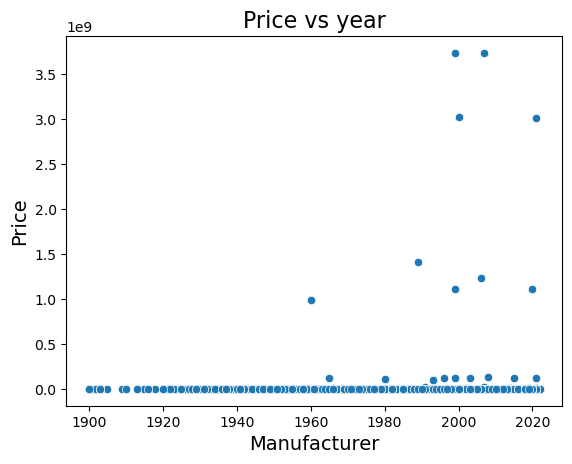

In [13]:
# I want to use scatter plot to see below columns's relationship with price
# year
# manufacturer
# model
# odometer
# type

sns.scatterplot(x='year', y='price', data=car_clean)
plt.title('Price vs year', fontsize=16)
plt.xlabel('Manufacturer', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()
# I can clear see price goes high as year is newer, I will pick it in training set

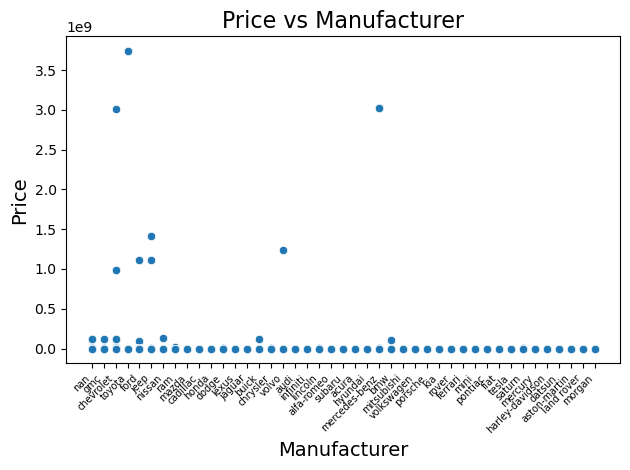

In [14]:
sns.scatterplot(x='manufacturer', y='price', data=car_clean)
plt.xticks(rotation=45, fontsize=7, ha='right')  # Adjust rotation, font size, and alignment
plt.title('Price vs Manufacturer', fontsize=16)
plt.xlabel('Manufacturer', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.tight_layout()
plt.show()
# looks like different manufacture does not make price changes differently, I will ignore it from training data.

['nan' 'sierra 1500 crew cab slt' 'silverado 1500' ... 'gand wagoneer'
 '96 Suburban' 'Paige Glenbrook Touring']


<Axes: xlabel='model', ylabel='price'>

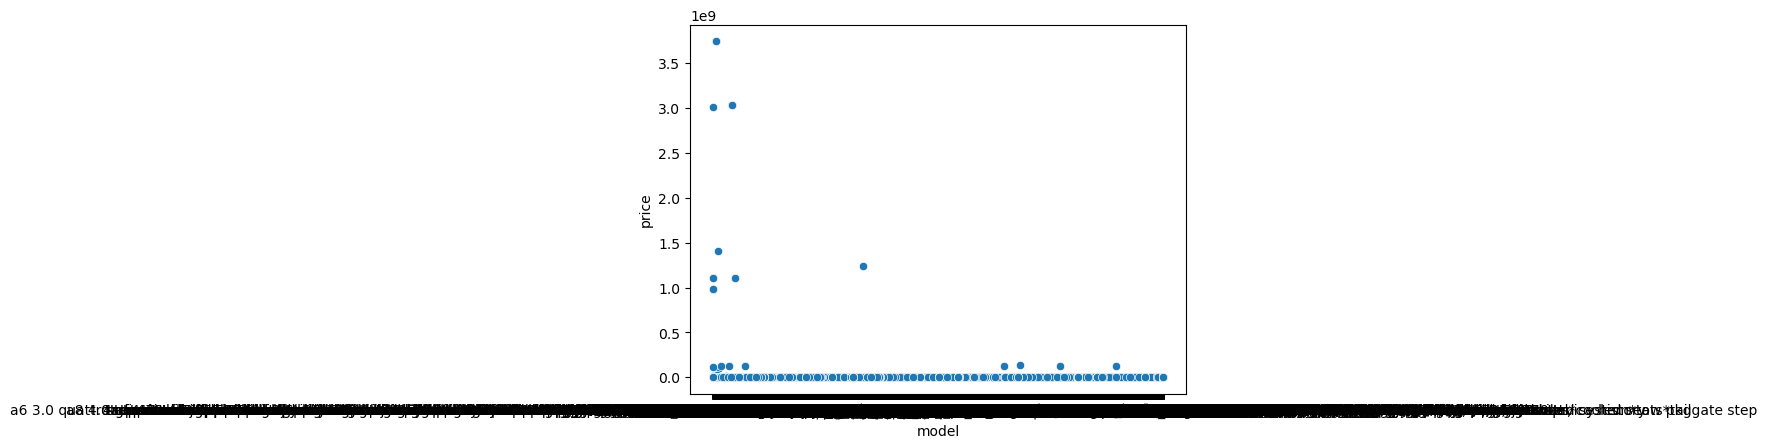

In [18]:
#print(car_clean['model'].mode()[0])
#print(car_clean['model'].unique())
# Found model with / and $, I need to remove, otherwise plot does not work.
car_clean['model'] = car_clean['model'].str.replace(r'[\$\\]', '', regex=True)
print(car_clean['model'].unique())
# sns.scatterplot(x='model', y='price', data=car_clean)
# model does not make price much difference-> drop

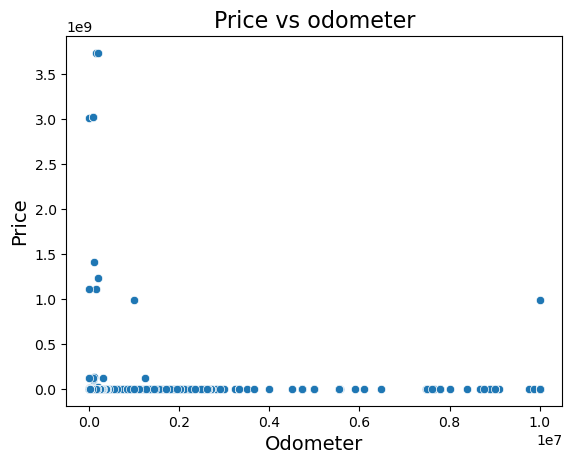

In [19]:
sns.scatterplot(x='odometer', y='price', data=car_clean)
plt.title('Price vs odometer', fontsize=16)
plt.xlabel('Odometer', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()
# odometer is high correlate with price -> pick

Therefore, I will pick year and odometer as training data to predict car price

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.